## Outliers for final csv

In [1]:
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import requests

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv (r'C:\Users\USER\Documents\HIT- תואר ראשון מדעי המחשב\שנה ב\סימסטר ב\מבוא למדעי הנתונים\חומרים ללמידת מכונה\Final (1).csv')
df

,Unnamed: 0,AQI,Temperature,Humidity,Wind,Pressure,City,State,Country,Forest_percentage,AQI_categotial,Population,Motor_vehicles_per_1k
0,0,29.0,14,37,105,1015,Ashkasham,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
1,1,42.0,29,23,86,1005,BazareTashkan,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
2,2,42.0,22,26,52,1005,HafizMoghul,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
3,3,42.0,18,40,134,1013,KuranwaMunjan,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
4,4,42.0,31,21,85,1004,Mashhad,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58628,58628,46.0,20,25,83,1019,Beitbridge,MatabelelandSouth,Zimbabwe,66.35,1.0,14645468.0,60.0
58629,58629,42.0,15,14,41,1021,Kwekwe,Midlands,Zimbabwe,66.35,1.0,14645468.0,60.0
58630,58630,53.0,15,21,78,1021,Plumtree,MatabelelandSouth,Zimbabwe,66.35,2.0,14645468.0,60.0
58631,58631,42.0,13,18,99,1022,Mvuma,Midlands,Zimbabwe,66.35,1.0,14645468.0,60.0


In [4]:
df.describe(include='all')

,Unnamed: 0,AQI,Temperature,Humidity,Wind,Pressure,City,State,Country,Forest_percentage,AQI_categotial,Population,Motor_vehicles_per_1k
count,58633.000000,58589.000000,58633.000000,58633.000000,58633.000000,58633.000000,58633,58633,58633,39053.000000,58373.000000,3.971500e+04,39715.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,51795,1958,186,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Clinton,Bavaria,USA,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,24,1756,16721,NaN,NaN,NaN,NaN
mean,29316.000000,36.504344,22.874320,65.406358,88.983712,1012.592806,NaN,NaN,NaN,33.571829,1.270759,1.740732e+08,391.555835
std,16926.033504,28.588833,5.602679,20.040864,68.010007,7.231725,NaN,NaN,NaN,14.202023,0.568986,3.770779e+08,230.397923
min,0.000000,0.000000,0.000000,1.000000,0.000000,507.000000,NaN,NaN,NaN,0.070000,1.000000,1.000000e+00,1.000000
25%,14658.000000,17.000000,20.000000,52.000000,36.000000,1010.000000,NaN,NaN,NaN,24.560000,1.000000,1.000000e+00,111.000000
50%,29316.000000,29.000000,23.000000,66.000000,74.000000,1013.000000,NaN,NaN,NaN,32.000000,1.000000,3.741105e+07,478.000000
75%,43974.000000,46.000000,26.000000,82.000000,124.000000,1016.000000,NaN,NaN,NaN,36.760000,1.000000,9.646211e+07,561.000000


handle outliers

Text(0, 0.5, 'Frequency')

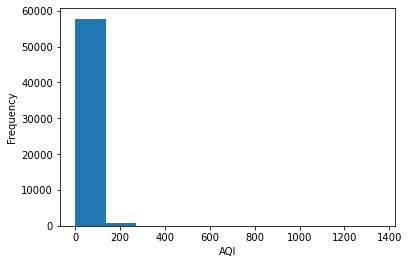

In [5]:
plt.hist(df.AQI,bins=10)
plt.xlabel("AQI")
plt.ylabel("Frequency")

In [6]:
sum(df.AQI>250)

5

<AxesSubplot:xlabel='AQI'>

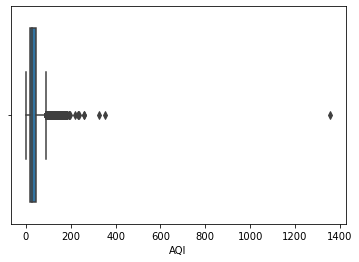

In [7]:
sns.boxplot(df.AQI)

In [8]:
sum(df.AQI>300)


3

In [9]:
df.AQI[df.AQI>300]=np.nan  

after handling AQI outliers:

In [10]:
sum(df.AQI>300)

0

<AxesSubplot:xlabel='AQI'>

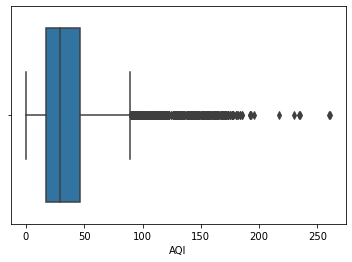

In [11]:
sns.boxplot(df.AQI)

fuction to clear outliers per col:

In [12]:
def outlier_iqr(df,col):
    Q1=np.percentile(df[col],25)
    Q3=np.percentile(df[col],75)
    IQR=Q3-Q1
    print(Q1,Q3,IQR)
    IQR_range=1.5*IQR
    row_outlier=df[(df[col]<Q1-IQR_range)|(df[col]>Q3+IQR_range)].index   
    for i in row_outlier:
        df.loc[i,col]=np.nan
    return df

In [13]:
df.Temperature.describe()

count    58633.000000
mean        22.874320
std          5.602679
min          0.000000
25%         20.000000
50%         23.000000
75%         26.000000
max         54.000000
Name: Temperature, dtype: float64

In [14]:
outlier_iqr(df,'Temperature')
df.Temperature.describe()

20.0 26.0 6.0


count    56149.000000
mean        23.242284
std          4.555281
min         11.000000
25%         21.000000
50%         23.000000
75%         26.000000
max         35.000000
Name: Temperature, dtype: float64

In [15]:
df.Humidity.describe()

count    58633.000000
mean        65.406358
std         20.040864
min          1.000000
25%         52.000000
50%         66.000000
75%         82.000000
max        100.000000
Name: Humidity, dtype: float64

In [16]:
outlier_iqr(df,'Humidity')
df.Humidity.describe()

52.0 82.0 30.0


count    58563.000000
mean        65.479808
std         19.939715
min          7.000000
25%         52.000000
50%         66.000000
75%         82.000000
max        100.000000
Name: Humidity, dtype: float64

In [17]:
df.Wind.describe()

count    58633.000000
mean        88.983712
std         68.010007
min          0.000000
25%         36.000000
50%         74.000000
75%        124.000000
max        901.000000
Name: Wind, dtype: float64

In [18]:
outlier_iqr(df,'Wind')
df.Wind.describe()

36.0 124.0 88.0


count    57107.000000
mean        83.254627
std         58.460934
min          0.000000
25%         35.000000
50%         74.000000
75%        116.000000
max        256.000000
Name: Wind, dtype: float64

In [19]:
df.Pressure.describe()

count    58633.000000
mean      1012.592806
std          7.231725
min        507.000000
25%       1010.000000
50%       1013.000000
75%       1016.000000
max       1059.000000
Name: Pressure, dtype: float64

In [20]:
outlier_iqr(df,'Pressure')
df.Pressure.describe()

1010.0 1016.0 6.0


count    56536.000000
mean      1012.961423
std          4.313731
min       1001.000000
25%       1011.000000
50%       1013.000000
75%       1016.000000
max       1025.000000
Name: Pressure, dtype: float64

In [21]:
df.Forest_percentage.describe()

count    39053.000000
mean        33.571829
std         14.202023
min          0.070000
25%         24.560000
50%         32.000000
75%         36.760000
max         90.200000
Name: Forest_percentage, dtype: float64

In [22]:
outlier_iqr(df,'Forest_percentage')
df.Forest_percentage.describe()

nan nan nan


count    39053.000000
mean        33.571829
std         14.202023
min          0.070000
25%         24.560000
50%         32.000000
75%         36.760000
max         90.200000
Name: Forest_percentage, dtype: float64

In [23]:
df.AQI_categotial.describe()

count    58373.000000
mean         1.270759
std          0.568986
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: AQI_categotial, dtype: float64

In [24]:
outlier_iqr(df,'AQI_categotial')
df.AQI_categotial.describe()

nan nan nan


count    58373.000000
mean         1.270759
std          0.568986
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: AQI_categotial, dtype: float64

In [25]:
df.Population.describe()

count    3.971500e+04
mean     1.740732e+08
std      3.770779e+08
min      1.000000e+00
25%      1.000000e+00
50%      3.741105e+07
75%      9.646211e+07
max      1.366418e+09
Name: Population, dtype: float64

In [26]:
outlier_iqr(df,'Population')
df.Population.describe()

nan nan nan


count    3.971500e+04
mean     1.740732e+08
std      3.770779e+08
min      1.000000e+00
25%      1.000000e+00
50%      3.741105e+07
75%      9.646211e+07
max      1.366418e+09
Name: Population, dtype: float64

In [27]:
df.Motor_vehicles_per_1k.describe()

count    39715.000000
mean       391.555835
std        230.397923
min          1.000000
25%        111.000000
50%        478.000000
75%        561.000000
max        899.000000
Name: Motor_vehicles_per_1k, dtype: float64

In [28]:
outlier_iqr(df,'Motor_vehicles_per_1k')
df.Motor_vehicles_per_1k.describe()

nan nan nan


count    39715.000000
mean       391.555835
std        230.397923
min          1.000000
25%        111.000000
50%        478.000000
75%        561.000000
max        899.000000
Name: Motor_vehicles_per_1k, dtype: float64

In [29]:
df=df.dropna()
df

,Unnamed: 0,AQI,Temperature,Humidity,Wind,Pressure,City,State,Country,Forest_percentage,AQI_categotial,Population,Motor_vehicles_per_1k
0,0,29.0,14.0,37.0,105.0,1015.0,Ashkasham,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
1,1,42.0,29.0,23.0,86.0,1005.0,BazareTashkan,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
2,2,42.0,22.0,26.0,52.0,1005.0,HafizMoghul,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
3,3,42.0,18.0,40.0,134.0,1013.0,KuranwaMunjan,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
4,4,42.0,31.0,21.0,85.0,1004.0,Mashhad,Badakhshan,Afghanistan,0.25,1.0,38041754.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58628,58628,46.0,20.0,25.0,83.0,1019.0,Beitbridge,MatabelelandSouth,Zimbabwe,66.35,1.0,14645468.0,60.0
58629,58629,42.0,15.0,14.0,41.0,1021.0,Kwekwe,Midlands,Zimbabwe,66.35,1.0,14645468.0,60.0
58630,58630,53.0,15.0,21.0,78.0,1021.0,Plumtree,MatabelelandSouth,Zimbabwe,66.35,2.0,14645468.0,60.0
58631,58631,42.0,13.0,18.0,99.0,1022.0,Mvuma,Midlands,Zimbabwe,66.35,1.0,14645468.0,60.0


In [30]:
df.describe(include='all')

,Unnamed: 0,AQI,Temperature,Humidity,Wind,Pressure,City,State,Country,Forest_percentage,AQI_categotial,Population,Motor_vehicles_per_1k
count,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732,34732,34732,34732.000000,34732.000000,3.473200e+04,34732.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,33794,1432,130,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Marseille,Bavaria,France,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,13,1708,8757,NaN,NaN,NaN,NaN
mean,21892.361684,38.658730,22.863526,67.295952,85.413970,1012.793044,NaN,NaN,NaN,34.935368,1.271191,1.596259e+08,396.201284
std,12932.666934,26.633263,4.095971,19.209496,58.610979,4.271886,NaN,NaN,NaN,13.586778,0.562284,3.522404e+08,217.949277
min,0.000000,1.000000,11.000000,7.000000,0.000000,1001.000000,NaN,NaN,NaN,0.070000,1.000000,1.000000e+00,1.000000
25%,11947.750000,21.000000,20.000000,53.000000,38.000000,1011.000000,NaN,NaN,NaN,30.100000,1.000000,1.000000e+00,177.000000
50%,20774.500000,34.000000,23.000000,69.000000,74.000000,1013.000000,NaN,NaN,NaN,35.000000,1.000000,3.804175e+07,478.000000
75%,30587.250000,46.000000,25.000000,83.000000,119.000000,1015.000000,NaN,NaN,NaN,36.760000,1.000000,8.351704e+07,561.000000


In [31]:
df["AQI_under_150"]=df["AQI_categotial"]<=2
df.describe(include='all')
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [32]:
isGoodAQI=df.drop(["AQI_categotial"],axis=1)
isGoodAQI

,AQI,Temperature,Humidity,Wind,Pressure,City,State,Country,Forest_percentage,Population,Motor_vehicles_per_1k,AQI_under_150
0,29.0,14.0,37.0,105.0,1015.0,Ashkasham,Badakhshan,Afghanistan,0.25,38041754.0,47.0,True
1,42.0,29.0,23.0,86.0,1005.0,BazareTashkan,Badakhshan,Afghanistan,0.25,38041754.0,47.0,True
2,42.0,22.0,26.0,52.0,1005.0,HafizMoghul,Badakhshan,Afghanistan,0.25,38041754.0,47.0,True
3,42.0,18.0,40.0,134.0,1013.0,KuranwaMunjan,Badakhshan,Afghanistan,0.25,38041754.0,47.0,True
4,42.0,31.0,21.0,85.0,1004.0,Mashhad,Badakhshan,Afghanistan,0.25,38041754.0,47.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
58628,46.0,20.0,25.0,83.0,1019.0,Beitbridge,MatabelelandSouth,Zimbabwe,66.35,14645468.0,60.0,True
58629,42.0,15.0,14.0,41.0,1021.0,Kwekwe,Midlands,Zimbabwe,66.35,14645468.0,60.0,True
58630,53.0,15.0,21.0,78.0,1021.0,Plumtree,MatabelelandSouth,Zimbabwe,66.35,14645468.0,60.0,True
58631,42.0,13.0,18.0,99.0,1022.0,Mvuma,Midlands,Zimbabwe,66.35,14645468.0,60.0,True


In [33]:
isGoodAQI.columns

Index(['AQI', 'Temperature', 'Humidity', 'Wind', 'Pressure', 'City', 'State',
       'Country', 'Forest_percentage', 'Population', 'Motor_vehicles_per_1k',
       'AQI_under_150'],
      dtype='object')

In [35]:
isGoodAQI.drop(['City', 'State', 'Country'],axis=1, inplace=True)
isGoodAQI

,AQI,Temperature,Humidity,Wind,Pressure,Forest_percentage,Population,Motor_vehicles_per_1k,AQI_under_150
0,29.0,14.0,37.0,105.0,1015.0,0.25,38041754.0,47.0,True
1,42.0,29.0,23.0,86.0,1005.0,0.25,38041754.0,47.0,True
2,42.0,22.0,26.0,52.0,1005.0,0.25,38041754.0,47.0,True
3,42.0,18.0,40.0,134.0,1013.0,0.25,38041754.0,47.0,True
4,42.0,31.0,21.0,85.0,1004.0,0.25,38041754.0,47.0,True
...,...,...,...,...,...,...,...,...,...
58628,46.0,20.0,25.0,83.0,1019.0,66.35,14645468.0,60.0,True
58629,42.0,15.0,14.0,41.0,1021.0,66.35,14645468.0,60.0,True
58630,53.0,15.0,21.0,78.0,1021.0,66.35,14645468.0,60.0,True
58631,42.0,13.0,18.0,99.0,1022.0,66.35,14645468.0,60.0,True


In [36]:
isGoodAQI.to_csv("isGoodAQI.csv")
df.to_csv("Final_after_outliers.csv")